##  James Griffin 
###  first EDA of the semester 
### Stat 536 


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data = pd.read_csv("../data/first_homework_data.csv")

In [13]:
data.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender',
       'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

Ok so according to the variable description, it appears as if balance is my outcome variable,
and it l ooks like gender, student, married and ethnicity are all categoricals, which we can dummy to get numeric values for them 


In [14]:
data= pd.concat([data, pd.get_dummies(data.Gender), pd.get_dummies(data.Ethnicity)], axis = 1)
data.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Male,Female,African American,Asian,Caucasian
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,581.74,1,0,0,0,1
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,1259.22,0,1,0,1,0
2,104.593,7075,514,4,71,11,Male,No,No,Asian,301.46,1,0,0,1,0
3,148.924,9504,681,3,36,11,Female,No,No,Asian,878.14,0,1,0,1,0
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,509.92,1,0,0,0,1


In [15]:
#and because married and studenta are both  yes  no, I will dummie and rename 
m = pd.get_dummies(data.Married)
m.rename(columns = {'Yes':'yes_m', 'No':'no_m'}, inplace = True)
s = pd.get_dummies(data.Student)
s.rename(columns = {'Yes':'yes_s', 'No':'no_s'}, inplace = True)
data= pd.concat([data,s, m], axis = 1)

In [16]:
data =  data.drop(columns = ['Ethnicity', "Married", "Student",
                            'Gender'])

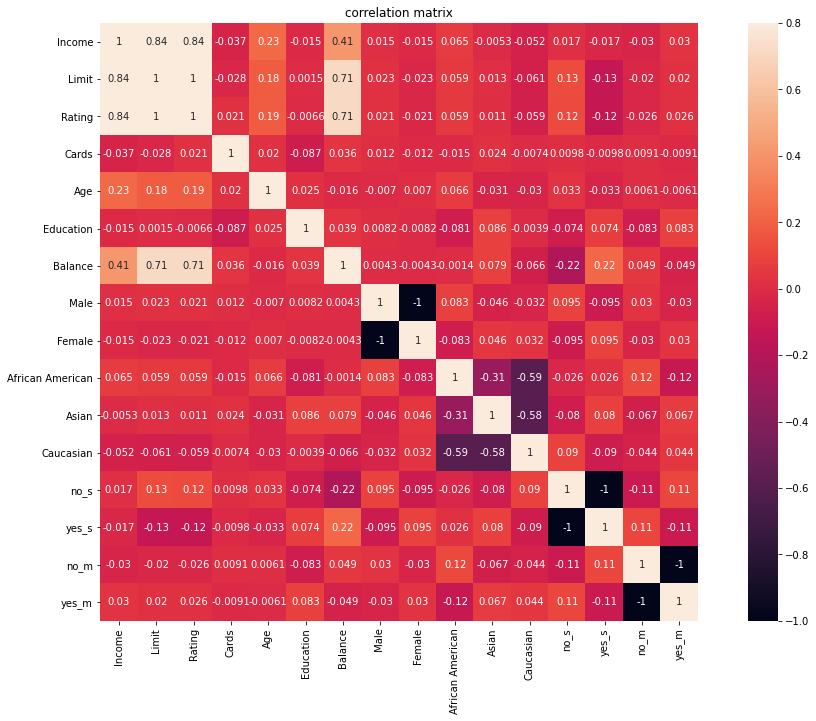

In [17]:
#creating a correlation matrix to see how  the variables are intercorrelated  
corr_mat = data.corr()
f, ax = plt.subplots(figsize = (18,11))
sns.heatmap(corr_mat,vmax=.8,square=True, annot = True)
plt.title("correlation matrix")
plt.show()

ok some rather obvious things, your credit limit is highly correlated with income and ratings, that makes  lots of sense, and the credit balance, also has a lot to do with your credit rating and your credit limit, also makes lots of sense. otherthan that however,  nota whole lot  to take away, age not super correlated, education not really either, those I would have thought would have been highly correlated together but guess they aren't so that is interesting to not at least 

because balance is our outcome variable, my initial thought would be to  exclude the cards, age, eduction features and only focus on the three that are more highly correlated with the outcome.. just a thought, could introduce some bias, would need to tun first to see what's cooking 
and it does not appear as if bieng male or female,student or non student, married or otherwise is supper correlated other than yes  student is slightly correlated with balance at .22 so kinda whatever 

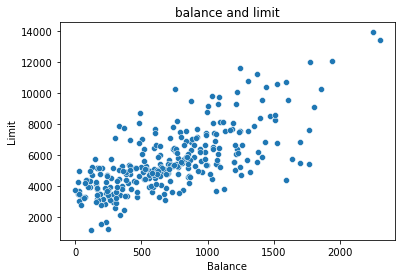

In [18]:
#creating some scatter plotts 

sns.scatterplot(x = data.Balance, y = data.Limit)
plt.title("balance and limit")
plt.show()
#ok do  this for a few more 

In [19]:
#looking to see if I have null or missing data to see what I need to do with that
data.isnull().sum()
#oh nice! 

Income              0
Limit               0
Rating              0
Cards               0
Age                 0
Education           0
Balance             0
 Male               0
Female              0
African American    0
Asian               0
Caucasian           0
no_s                0
yes_s               0
no_m                0
yes_m               0
dtype: int64

In [20]:
data.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance,Male,Female,African American,Asian,Caucasian,no_s,yes_s,no_m,yes_m
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,50.731153,5590.421769,412.112245,3.010204,55.377551,13.329932,715.786020,0.476190,0.523810,0.241497,0.234694,0.523810,0.874150,0.125850,0.377551,0.622449
std,38.580866,2051.591174,137.906004,1.444029,17.390819,3.185396,450.124066,0.500284,0.500284,0.428720,0.424530,0.500284,0.332246,0.332246,0.485601,0.485601
min,10.354000,1160.000000,126.000000,1.000000,23.000000,5.000000,1.340000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.980750,4264.750000,320.000000,2.000000,41.250000,11.000000,353.155000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,38.416000,5198.500000,383.000000,3.000000,55.000000,14.000000,667.540000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,64.136500,6623.750000,480.500000,4.000000,69.000000,16.000000,996.525000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,2299.040000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


 ##### a datafield that could be  hard to  handel is eduation 
 reason being is I believet that there are probably decreasing returns to the amount of education that a pereson has and the money they make, but that is not true for the  first few data points, I think that that curve is definently logistic, ahd has a huge increase around like 14,  so after highschool, getting a college degree, so finding a function that could modify that could be potentially challenging  
 
 a curious side note, only 3 races were included in the data, are hispanics / polynesians grouped under one of these races or simply left out of the data entirely 